# Task No 2 - Clustering using Unsupervised Learning

In this task, we are going cluster the data provided by the organization and in end we will visualize the cluster.

**Author:** Shahzad Abbas

## Importing important modules

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (12, 6)

## Loading Data

In [70]:
path = r"D:\CHAND's DATA\Study data\Additional Work\Data Science\Spark Foundation Internship\Task 2\Iris.csv"
df = pd.read_csv(path, sep=",", index_col="Id")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [71]:
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [72]:
df.shape

(150, 5)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


Data has 4 features and 1 target column. Target colum is of catgorical type.

There 150 records and none of the cells is empty.

## Exploratory Data Analysis

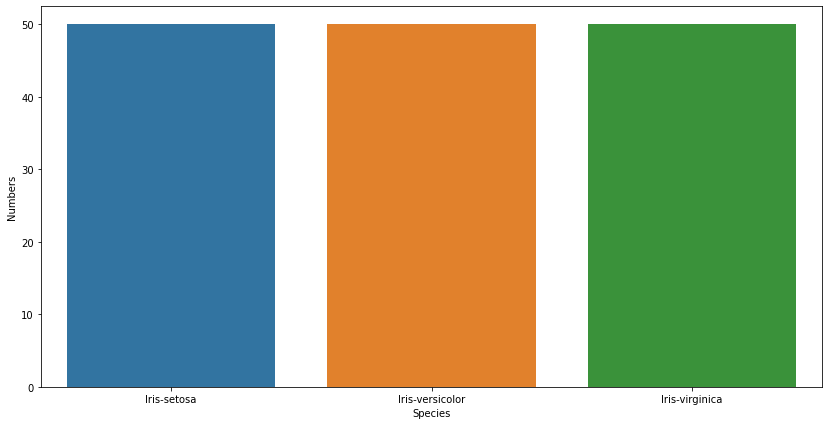

In [74]:
sns.countplot(x=df.Species)
plt.ylabel("Numbers")
plt.show()

Every category has equal number of records 50.

<AxesSubplot:ylabel='Frequency'>

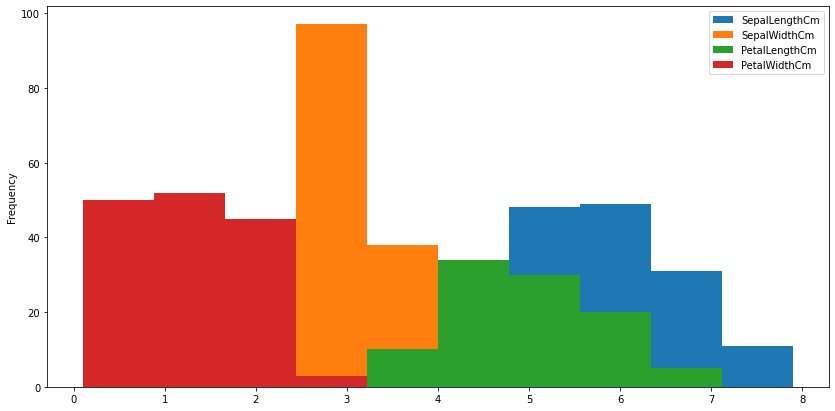

In [75]:
df.plot(kind="hist")

## Model Preparation

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [77]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [78]:
le = LabelEncoder()
y = le.fit_transform(y)

In [79]:
error = []
for i in range(1, 7):
    model = KMeans(n_clusters=i)
    model.fit(x)
    error.append(model.inertia_)

C:\Users\Ch Chand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method')

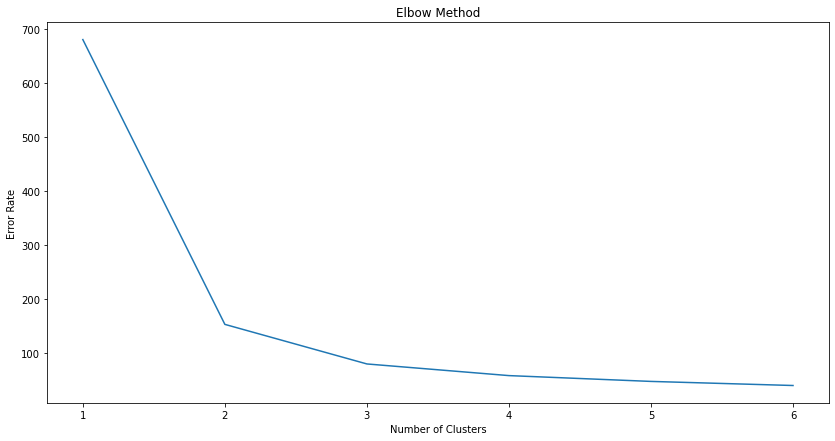

In [80]:
plt.plot(range(1, 7), error)
plt.xlabel("Number of Clusters")
plt.ylabel("Error Rate")
plt.title("Elbow Method")

By this method we can see that 3 clusters will be optimal

In [81]:
model = KMeans(n_clusters=3, max_iter=300)
model.fit(x)
y_pred = model.predict(x)

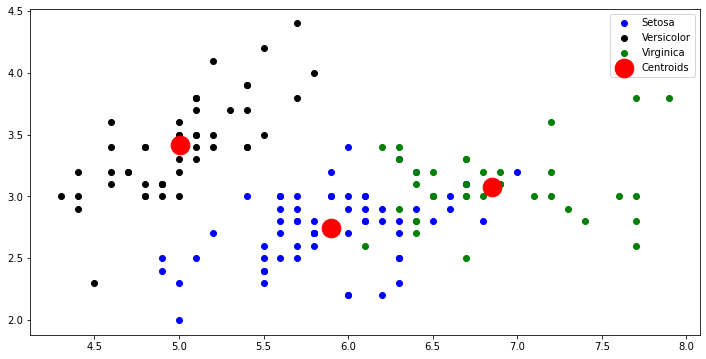

In [98]:
plt.scatter(x[y_pred == 0, 0], x[y_pred==0, 1], color="blue", label = 'Setosa')
plt.scatter(x[y_pred == 1, 0], x[y_pred==1, 1], color="black", label = 'Versicolor')
plt.scatter(x[y_pred == 2, 0], x[y_pred==2, 1], color="green", label = 'Virginica')

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], color="red", marker="o", label = 'Centroids', s=350)
plt.legend()
plt.show()